In [1]:
pip install pandas requests matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import json

# Loading the CSV Data
csv_file = 'cordon-count-november-2019.csv'
df = pd.read_csv(csv_file)

# Displaying first few rows of the CSV data
df.head()

# Loading the JSON Data
json_file = 'dublin_bikes.json'
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Normalizing the JSON data (flattening it)
json_df = pd.json_normalize(json_data['features'])

# Displaying first few rows of the JSON data
json_df.head()

C:\Users\igerl\AppData\Local\Temp\ipykernel_3528\1072914428.py:6: DtypeWarning: Columns (3,5,6,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


,type,geometry.type,geometry.coordinates,properties.system_id,properties.station_id,properties.last_reported,properties.num_bikes_available,properties.num_docks_available,properties.is_installed,properties.is_renting,properties.is_returning,properties.last_updated,properties.name,properties.short_name,properties.address,properties.region_id,properties.capacity,properties.last_reported_dt
0,Feature,Point,"[-6.262500762939453, 53.34092712402344]",dublin_bikes,1,1735797281,2,29,True,True,True,1735797281,CLARENDON ROW,,Clarendon Row,,31,2025-01-02 05:54:41
1,Feature,Point,"[-6.266801834106445, 53.3440055847168]",dublin_bikes,10,1735797446,12,4,True,True,True,1735797446,DAME STREET,,Dame Street,,16,2025-01-02 05:57:26
2,Feature,Point,"[-6.292040824890137, 53.34710693359375]",dublin_bikes,100,1735797248,16,9,True,True,True,1735797248,HEUSTON BRIDGE (SOUTH),,Heuston Bridge (South),,25,2025-01-02 05:54:08


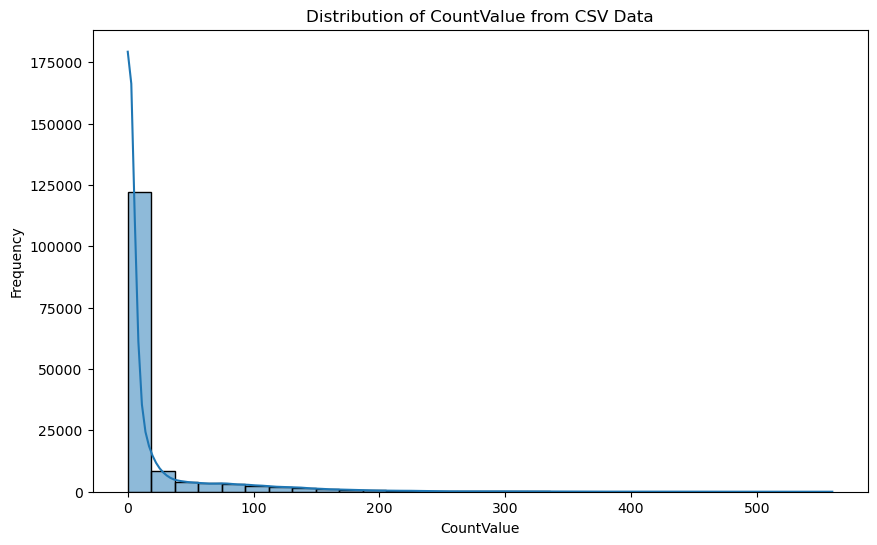

C:\Users\igerl\AppData\Local\Temp\ipykernel_3528\3283316017.py:19: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


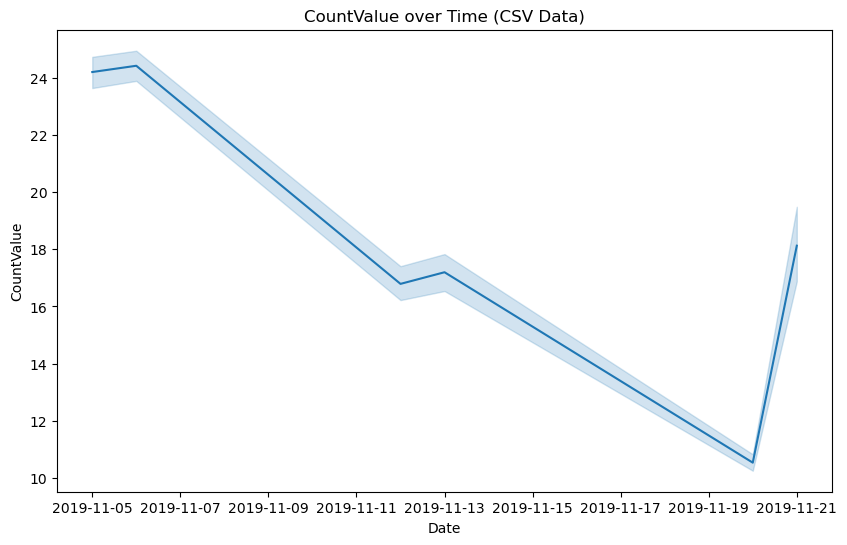

In [2]:
# Checking for missing values in the CSV data
missing_values_csv = df.isnull().sum()

# Basic statistics of the CSV data
csv_stats = df.describe()

# Plotting distribution of 'CountValue' from CSV data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['CountValue'], bins=30, kde=True)
plt.title('Distribution of CountValue from CSV Data')
plt.xlabel('CountValue')
plt.ylabel('Frequency')
plt.show()

# Plotting a time series for CountValue vs. Date (assuming 'Date' column is in correct format)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Date'], y=df['CountValue'])
plt.title('CountValue over Time (CSV Data)')
plt.xlabel('Date')
plt.ylabel('CountValue')
plt.show()

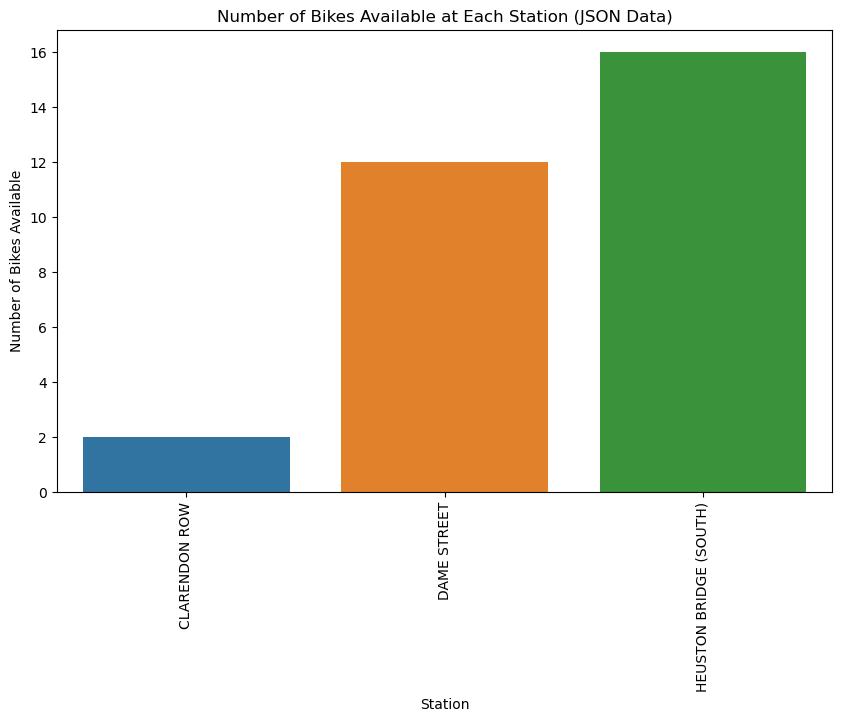

In [7]:
# Checking for missing values in the JSON data
missing_values_json = json_df.isnull().sum()

# Plotting the number of bikes available for each station in the JSON data
plt.figure(figsize=(10, 6))
sns.barplot(x=json_df['properties.name'], y=json_df['properties.num_bikes_available'])
plt.title('Number of Bikes Available at Each Station (JSON Data)')
plt.xlabel('Station')
plt.ylabel('Number of Bikes Available')
plt.xticks(rotation=90)
plt.show()

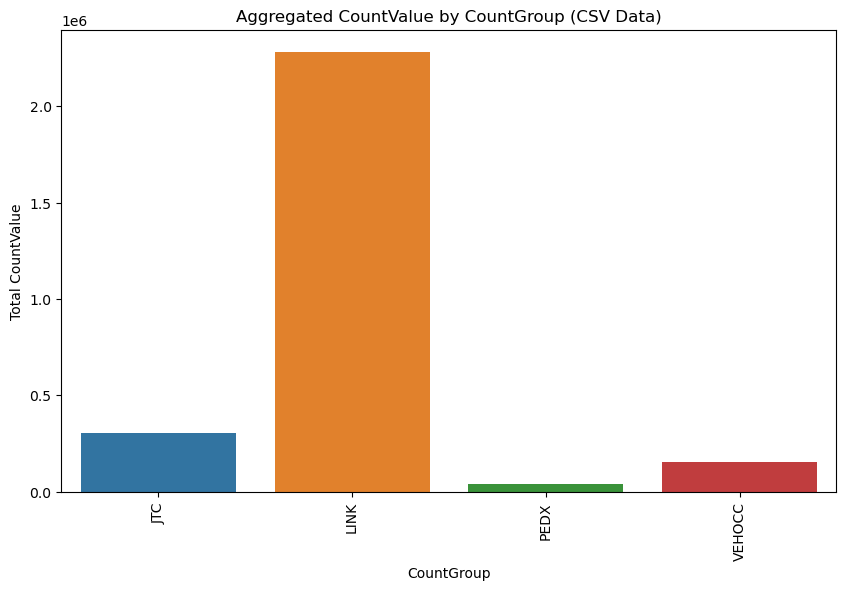

In [10]:
# Aggregating 'CountValue' by 'CountGroup' from the CSV data
csv_aggregated = df.groupby('CountGroup').agg({'CountValue': 'sum'}).reset_index()

# Plotting the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x=csv_aggregated['CountGroup'], y=csv_aggregated['CountValue'])
plt.title('Aggregated CountValue by CountGroup (CSV Data)')
plt.xlabel('CountGroup')
plt.ylabel('Total CountValue')
plt.xticks(rotation=90)
plt.show()

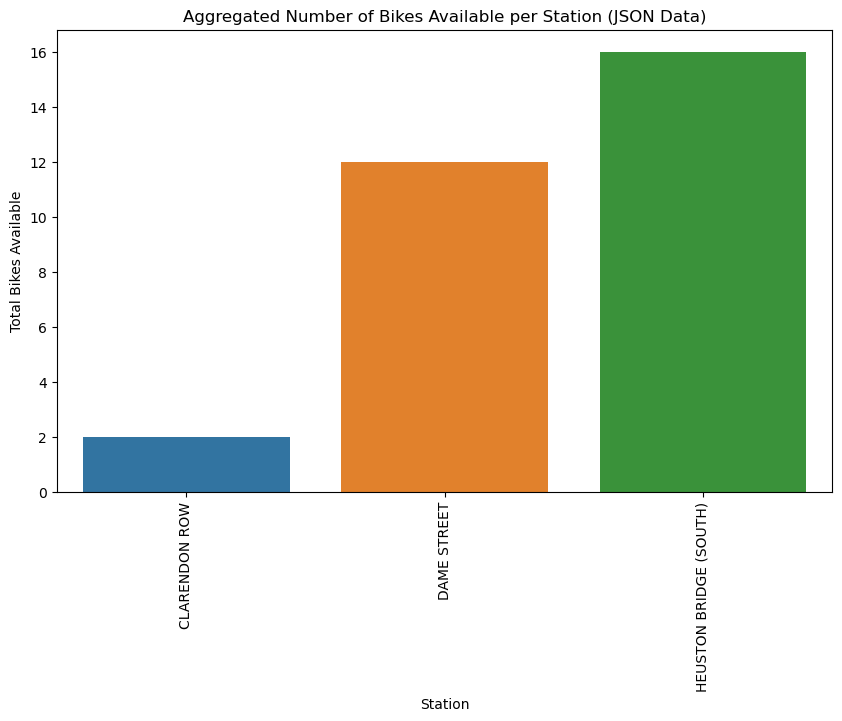

In [12]:
# Aggregating the total number of bikes available per station
json_aggregated = json_df.groupby('properties.name').agg({'properties.num_bikes_available': 'sum'}).reset_index()

# Plotting the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x=json_aggregated['properties.name'], y=json_aggregated['properties.num_bikes_available'])
plt.title('Aggregated Number of Bikes Available per Station (JSON Data)')
plt.xlabel('Station')
plt.ylabel('Total Bikes Available')
plt.xticks(rotation=90)
plt.show()


In [13]:
# Merging the CSV and JSON data on a common column (assuming 'site_number' and 'station_id' are common)
merged_data = pd.merge(df, json_df, left_on='SiteNumber', right_on='properties.station_id', how='inner')

# Display the first few rows of the merged data
merged_data.head()

,RecordID,CountGroup,SiteNumber,Direction,Movement,ArmFrom,ArmTo,DirectionFrom,DirectionTo,Date,...,properties.is_installed,properties.is_renting,properties.is_returning,properties.last_updated,properties.name,properties.short_name,properties.address,properties.region_id,properties.capacity,properties.last_reported_dt
